In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import pi

# Question 1
## part 1
### A)

In [2]:
sampling_frequency = 500
sampling_period = 1/sampling_frequency
x = np.arange(0, 2 + sampling_period, sampling_period)

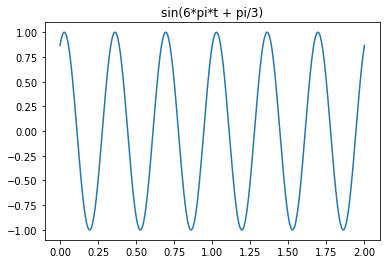

In [3]:
frequency = 3
phase = pi/3
angular_speed = 2*pi*frequency
y = np.sin(angular_speed*x + phase)
plt.plot(x, y)
plt.title("sin(6*pi*t + pi/3)")
plt.show()

### B)

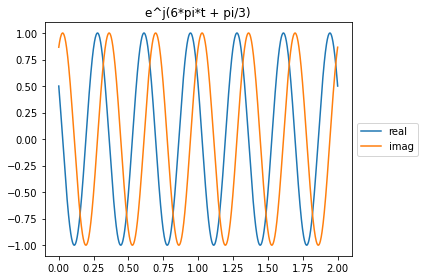

In [4]:
y = np.exp(complex(0,angular_speed)*x + complex(0,phase))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, np.real(y), label="real")
ax.plot(x, np.imag(y), label="imag")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("e^j(6*pi*t + pi/3)")
fig.tight_layout()
plt.show()

### C)

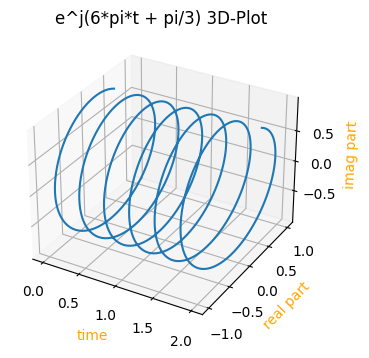

In [5]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, np.real(y), np.imag(y))
ax.set_xlabel("time", color="orange")
ax.set_ylabel("real part", color="orange")
ax.set_zlabel("imag part", color="orange")
ax.set_title("e^j(6*pi*t + pi/3) 3D-Plot")
plt.show()

## Part 2
### A)
we see that correlation coefficient and normalized dot products are equal:

In [6]:
correlation_coefficient = np.corrcoef(np.real(y), np.imag(y))
dot_product = np.dot(np.real(y), np.imag(y))
norm1 = np.linalg.norm(np.real(y))
norm2 = np.linalg.norm(np.imag(y))
normalized_products = dot_product / (norm1*norm2)
print("correlation coefficient = ", correlation_coefficient[0][1])
print("dot product = ", dot_product)
print("normalized products = ", normalized_products)

correlation coefficient =  0.000864296917770374
dot product =  0.43301270189221475
normalized products =  0.0008651603514699733


### B)

In [7]:
frequency = 5
phase = pi/2
angular_speed = 2*pi*frequency
y1 = np.sin(angular_speed*x + phase)
y2 = np.sin(angular_speed*x + phase)
print(np.dot(y1, y2))

501.0


frequency of one signal has changed 0.5Hz :

In [8]:
frequency = 5 + 0.5
angular_speed = 2*pi*frequency
y2 = np.sin(angular_speed*x + phase)
print("{:.1f}".format(np.dot(y1, y2)))

1.0


frequency of one signal has changed 0.35Hz :

In [9]:
frequency = 5 + 0.35
angular_speed = 2*pi*frequency
y2 = np.sin(angular_speed*x + phase)
print("{:.1f}".format(np.dot(y1, y2)))

-111.4


phase of one signal has changed $\frac{\pi}{2}$ :

In [10]:
frequency = 5
phase = pi/2 + pi/2
angular_speed = 2*pi*frequency
y2 = np.sin(angular_speed*x + phase)
print("{:.4f}".format(np.dot(y1, y2)))

0.0000


phase of one signal has changed $\frac{\pi}{3}$ :

In [11]:
frequency = 5
phase = pi/2 + pi/3
angular_speed = 2*pi*frequency
y2 = np.sin(angular_speed*x + phase)
print("{:.1f}".format(np.dot(y1, y2)))

250.5


### C)

In [12]:
sampling_frequency = 1000
sampling_period = 1/sampling_frequency
x = np.arange(-1, 1 + sampling_period, sampling_period)

first, we generate and plot the original signal:

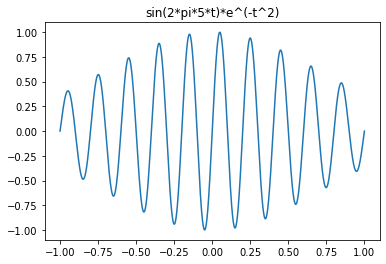

In [13]:
frequency = 5
phase = 0
angular_speed = 2*pi*frequency
y = np.sin(angular_speed*x + phase)*np.exp(-x**2)
plt.plot(x, y)
plt.title("sin(2*pi*5*t)*e^(-t^2)")
plt.show()

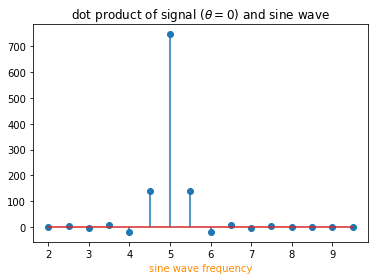

In [14]:
freqs = np.arange(2, 10, 0.5)
products = np.zeros(len(freqs))
for index in range(0, len(freqs)):
    angular_speed = 2*pi*freqs[index]
    sine_wave = np.sin(angular_speed*x)
    products[index] = np.dot(y, sine_wave)

plt.stem(freqs, products)
plt.title(r"dot product of signal ($\theta = 0$) and sine wave")
plt.xlabel("sine wave frequency", color="darkorange")
plt.show()

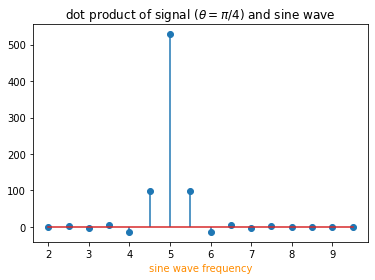

In [15]:
frequency = 5
phase = pi/4
angular_speed = 2*pi*frequency
y = np.sin(angular_speed*x + phase)*np.exp(-x**2)

for index in range(0, len(freqs)):
    angular_speed = 2*pi*freqs[index]
    sine_wave = np.sin(angular_speed*x)
    products[index] = np.dot(y, sine_wave)

plt.stem(freqs, products)
plt.title(r"dot product of signal ($\theta = \pi/4$) and sine wave")
plt.xlabel("sine wave frequency", color="darkorange")
plt.show()

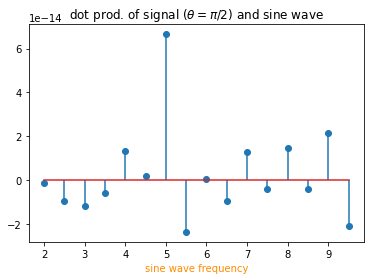

In [16]:
frequency = 5
phase = pi/2
angular_speed = 2*pi*frequency
y = np.sin(angular_speed*x + phase)*np.exp(-x**2)

for index in range(0, len(freqs)):
    angular_speed = 2*pi*freqs[index]
    sine_wave = np.sin(angular_speed*x)
    products[index] = np.dot(y, sine_wave)

plt.stem(freqs, products)
plt.title(r"dot prod. of signal ($\theta = \pi/2$) and sine wave")
plt.xlabel("sine wave frequency", color="darkorange")
plt.show()

### D)

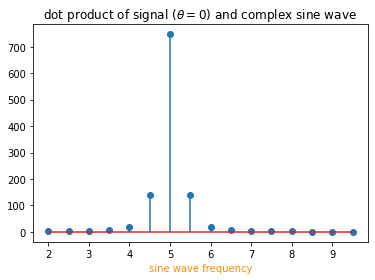

In [17]:
frequency = 5
phase = 0
angular_speed = 2*pi*frequency
y = np.sin(angular_speed*x + phase)*np.exp(-x**2)
complex_products = [complex(0,0) for i in range(0, len(freqs))]

for index in range(0, len(freqs)):
    angular_speed = 2*pi*freqs[index]
    complex_sine_wave = np.exp(complex(0,angular_speed)*x)
    complex_products[index] = complex(
        np.dot(y, np.real(complex_sine_wave)), np.dot(y, np.imag(complex_sine_wave))
    )

plt.stem(freqs, np.absolute(complex_products))
plt.title(r"dot product of signal ($\theta = 0$) and complex sine wave")
plt.xlabel("sine wave frequency", color="darkorange")
plt.show()

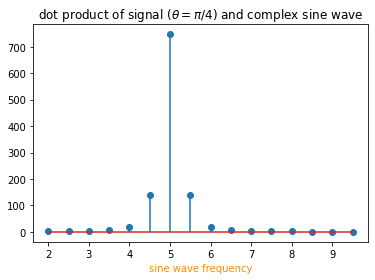

In [18]:
frequency = 5
phase = pi/4
angular_speed = 2*pi*frequency
y = np.sin(angular_speed*x + phase)*np.exp(-x**2)

for index in range(0, len(freqs)):
    angular_speed = 2*pi*freqs[index]
    complex_sine_wave = np.exp(complex(0,angular_speed)*x)
    complex_products[index] = complex(
        np.dot(y, np.real(complex_sine_wave)), np.dot(y, np.imag(complex_sine_wave))
    )

plt.stem(freqs, np.absolute(complex_products))
plt.title(r"dot product of signal ($\theta = \pi/4$) and complex sine wave")
plt.xlabel("sine wave frequency", color="darkorange")
plt.show()

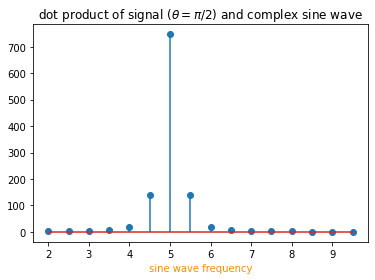

In [19]:
frequency = 5
phase = pi/2
angular_speed = 2*pi*frequency
y = np.sin(angular_speed*x + phase)*np.exp(-x**2)

for index in range(0, len(freqs)):
    angular_speed = 2*pi*freqs[index]
    complex_sine_wave = np.exp(complex(0,angular_speed)*x)
    complex_products[index] = complex(
        np.dot(y, np.real(complex_sine_wave)), np.dot(y, np.imag(complex_sine_wave))
    )

plt.stem(freqs, np.absolute(complex_products))
plt.title(r"dot product of signal ($\theta = \pi/2$) and complex sine wave")
plt.xlabel("sine wave frequency", color="darkorange")
plt.show()

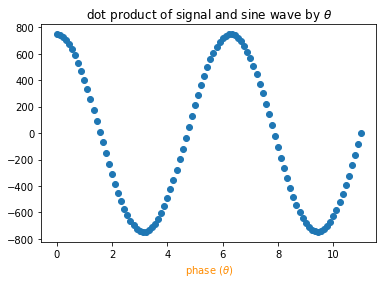

In [20]:
frequency = 5
angular_speed = 2*pi*frequency
thetas = np.linspace(0, 7*(pi/2), 100)
sine_wave = np.sin(angular_speed*x)
real_sine_prods = np.zeros(100)
complex_sine_wave = np.exp(complex(0,angular_speed)*x)
complex_sine_prods = [complex(0,0) for _ in range(0, 100)]

for index in range(0, 100):
    signal = np.sin(angular_speed*x + thetas[index])*np.exp(-x**2)
    real_sine_prods[index] = np.dot(signal, sine_wave)
    complex_sine_prods[index] = complex(
        np.dot(signal, np.real(complex_sine_wave)),
        np.dot(signal, np.imag(complex_sine_wave))
    )

plt.scatter(thetas, real_sine_prods)
plt.title(r"dot product of signal and sine wave by $\theta$")
plt.xlabel(r"phase ($\theta$)", color="darkorange")
plt.show()

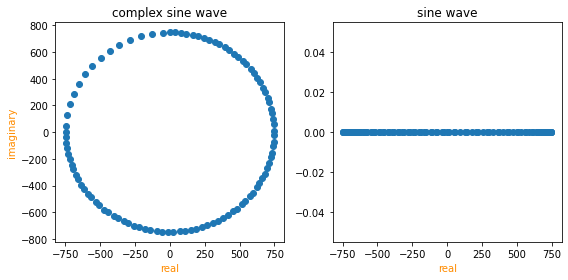

In [21]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.scatter(np.real(complex_sine_prods), np.imag(complex_sine_prods))
ax1.set_title("complex sine wave")
ax1.set_xlabel("real", color="darkorange")
ax1.set_ylabel("imaginary", color="darkorange")
ax2 = fig.add_subplot(122)
ax2.scatter(real_sine_prods, np.zeros(100))
ax2.set_title("sine wave")
ax2.set_xlabel("real", color="darkorange")
fig.tight_layout()
plt.show()